(60%) Peliculas

- Paso 1: Realiza un countplot mostrando la frecuencia de cada una de las evaluaciones: 1, 2, 3, 4 o 5 estrellas.

- Paso 2: Genera una matriz donde los renglones sean las peliculas y las columnas los usuarios, cada celda debe contener la evaluación que da el usuario a la pelicula. Genera y muestra un dataframe con esta información, es importante poner el index con el nombre de las peliculas.

- Paso 3: Calcula e imprime el número de  evaluaciones de cada una de las peliculas.

- Paso 4: Genera un boxplot y un histograma con el número de evaluaciones de las peliculas.

- Paso 5: Realiza una gráfica de pastel con el número de evaluaciones de las 5 películas con mayor número de evaluaciones, debes mostrar el nombre de las películas.

- Paso 6: Calcula e imprime el promedio de las calificaciones de cada una de las peliculas. Ojo: sólo debes tomar las evaluaciones realizadas (hay usuarios que no evaluaron peliculas y eso no es lo mismo a un 0).

- Paso 7: Realiza una gráfica de barras de las calificaciones promedio de las 5 peliculas con mayor promedio de calificación, debes mostrar el nombre de las películas.

- Paso 8: Realiza una gráfica de barras con el promedio de calificación de las 10 peliculas con mayor número de evaluaciones, debes mostrar el nombre de las películas.

- Paso 9: Calcula e imprime los estadísticos (min, max, promedio, desv estándar) de número de evaluaciones realizadas por tipo de usuario (programadores, cientìficos, etc.)

- Paso 10: Realiza una gráfica que tenga tantos boxplot como tipo de usuarios. Cada boxplot debe representar los números de evaluaciones de esos tipos de usuarios.

- Desde tu punto de vista, ¿Cuáles son las peliculas que más les gustan a los usuarios? Indica que valores numéricos o gráficas sustentan tu respuesta.

- Si fueras dueño de una plataforma de streaming de peliculas, ¿Cuàles son las peliculas que eliminarías del catálogo? ¿Por qué? Indica que valores numéricos o gráficas sustentan tu respuesta.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import entropy
import numpy as np

In [39]:
client_df = pd.read_csv('Clientes_descripcion.txt',delimiter='|',header=None)
movies_df = pd.read_csv('Peliculas_descripcion.txt', delimiter='|', header=None)
rating_df = pd.read_csv('Peliculas_Clientes.txt', delim_whitespace=True, header=None)

client_df = client_df.drop(client_df.iloc[:,4:5], axis=1)
movies_df = movies_df.drop(movies_df.iloc[:,3:5], axis=1)
movies_df = movies_df.drop(movies_df.iloc[:,3:], axis=1)
rating_df = rating_df.drop(rating_df.iloc[:,3:4], axis=1)

client_columns = ['id','age','sex','profession']
client_df.columns = client_columns

movies_columns = ['id','name','release_date']
movies_df.columns = movies_columns

rating_columns = ['user_id','movie_id','rating']
rating_df.columns = rating_columns

client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   profession  943 non-null    object
dtypes: int64(2), object(2)
memory usage: 29.6+ KB


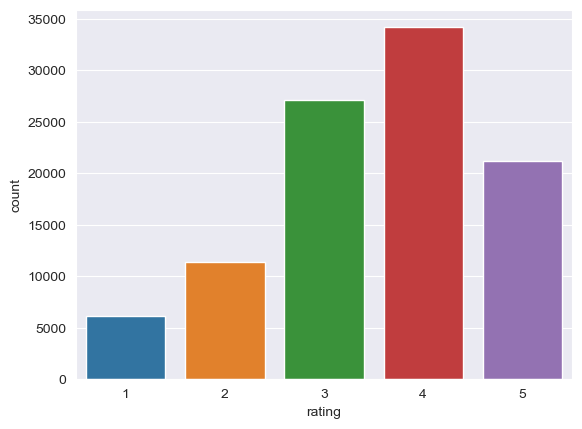

In [33]:
#- Paso 1: Realiza un countplot mostrando la frecuencia de cada una de las evaluaciones: 1, 2, 3, 4 o 5 estrellas.
sns.countplot(x='rating', data=rating_df)
plt.show()



In [86]:
#- Paso 2: Genera una matriz donde los renglones sean las peliculas y las columnas los usuarios, cada celda debe contener la evaluación que da el usuario a la pelicula. Genera y muestra un dataframe con esta información, es importante poner el index con el nombre de las peliculas.
rating_matrix = rating_df.pivot_table(index='movie_id', columns='user_id', values='rating')

rating_matrix.index = movies_df.set_index('id')['name']
rating_matrix



user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
name,,,,,,,,,,,,,,,,,,,,,
Toy Story (1995),5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
GoldenEye (1995),3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Four Rooms (1995),4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Get Shorty (1995),3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
Copycat (1995),3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mat' i syn (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B. Monkey (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sliding Doors (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
#- Paso 3: Calcula e imprime el número de  evaluaciones de cada una de las peliculas.
evalMovie = rating_matrix.apply(lambda x: x.count(), axis=1)
evalMovie

name
Toy Story (1995)                             452
GoldenEye (1995)                             131
Four Rooms (1995)                             90
Get Shorty (1995)                            209
Copycat (1995)                                86
                                            ... 
Mat' i syn (1997)                              1
B. Monkey (1998)                               1
Sliding Doors (1998)                           1
You So Crazy (1994)                            1
Scream of Stone (Schrei aus Stein) (1991)      1
Length: 1682, dtype: int64

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


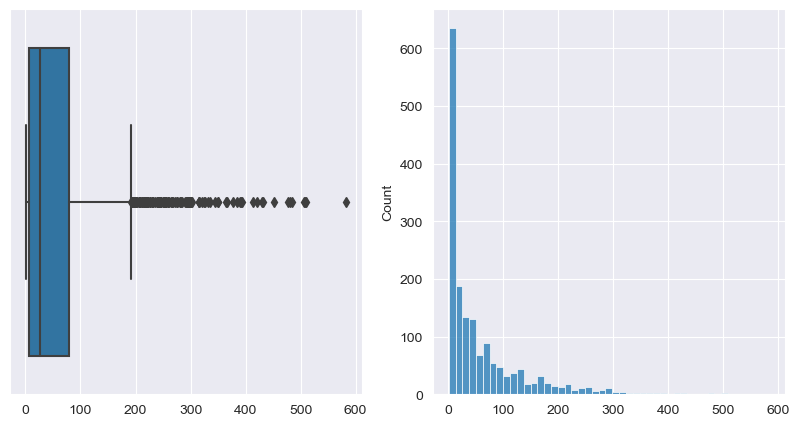

In [68]:
#- Paso 4: Genera un boxplot y un histograma con el número de evaluaciones de las peliculas.
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(evalMovie)
plt.subplot(1,2,2)
sns.histplot(evalMovie)
plt.show()


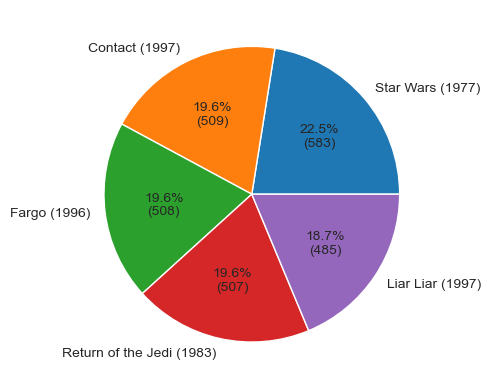

In [79]:
#- Paso 5: Realiza una gráfica de pastel con el número de evaluaciones de las 5 películas con mayor número de evaluaciones, debes mostrar el nombre de las películas.
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format
evalMovie = evalMovie.sort_values(ascending=False)
evalMovie = evalMovie.head(5)
plt.pie(evalMovie, labels=evalMovie.index, autopct=autopct_format(evalMovie))
plt.show()

In [94]:
#- Paso 6: Calcula e imprime el promedio de las calificaciones de cada una de las peliculas. Ojo: sólo debes tomar las evaluaciones realizadas (hay usuarios que no evaluaron peliculas y eso no es lo mismo a un 0).
sumMatrix = rating_matrix.sum(axis=1)
tempMovie = rating_matrix.apply(lambda x: x.count(), axis=1)
promMovie = sumMatrix/tempMovie
promMovie

name
Toy Story (1995)                             3.878319
GoldenEye (1995)                             3.206107
Four Rooms (1995)                            3.033333
Get Shorty (1995)                            3.550239
Copycat (1995)                               3.302326
                                               ...   
Mat' i syn (1997)                            1.000000
B. Monkey (1998)                             3.000000
Sliding Doors (1998)                         2.000000
You So Crazy (1994)                          3.000000
Scream of Stone (Schrei aus Stein) (1991)    3.000000
Length: 1682, dtype: float64

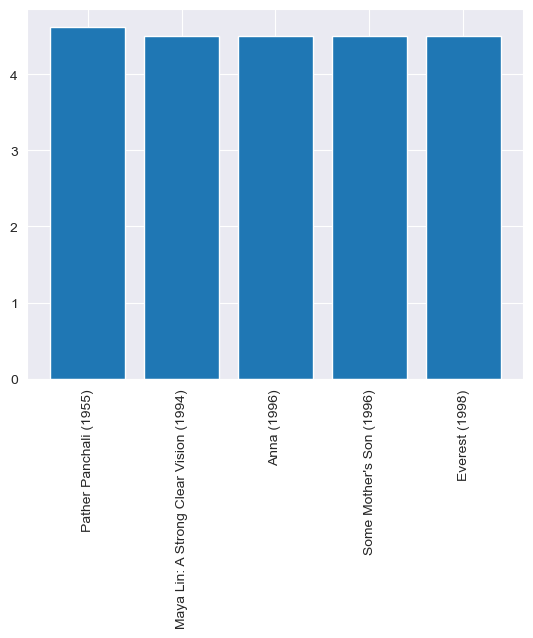

In [119]:
#- Paso 7: Realiza una gráfica de barras de las calificaciones promedio de las 5 peliculas con mayor promedio de calificación, debes mostrar el nombre de las películas.
promMovie = promMovie[promMovie != 5.0] #Hay unas películas que tienen 5 estrellas pero solo una evaluación, por lo que no se pueden tomar en cuenta

promMovie = promMovie.sort_values(ascending=False)
promMovie = promMovie.head(5)
plt.bar(promMovie.index, promMovie)
plt.xticks(rotation=90)
plt.show()




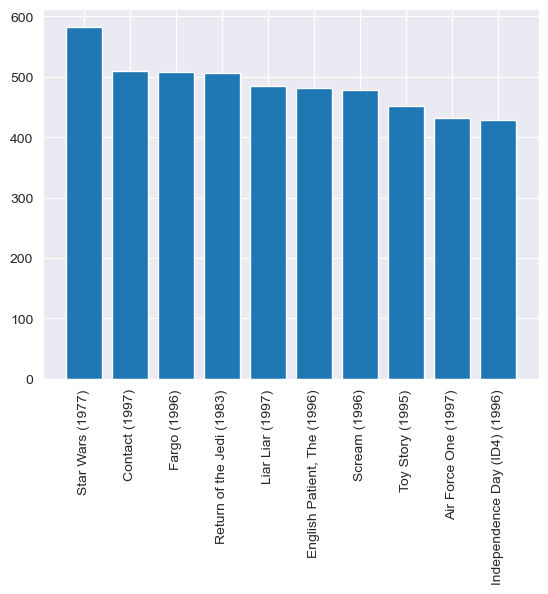

In [108]:
#- Paso 8: Realiza una gráfica de barras con el promedio de calificación de las 10 peliculas con mayor número de evaluaciones, debes mostrar el nombre de las películas.
evalMovie = evalMovie.sort_values(ascending=False)
evalMovie = evalMovie.head(10)
plt.bar(evalMovie.index, evalMovie)
plt.xticks(rotation=90)
plt.show()



In [123]:
#- Paso 9: Calcula e imprime los estadísticos (min, max, promedio, desv estándar) de número de evaluaciones realizadas por tipo de usuario (programadores, cientìficos, etc.)
merged_df = pd.merge(rating_df, client_df, left_on='user_id', right_on='id')

stats_df = merged_df.groupby('profession')['rating'].agg(['min', 'max', 'mean', 'std'])

stats_df


,min,max,mean,std
profession,,,,
administrator,1,5,3.635646,1.088252
artist,1,5,3.653380,1.175664
doctor,1,5,3.688889,0.962886
educator,1,5,3.670621,1.076938
engineer,1,5,3.541407,1.068359
entertainment,1,5,3.441050,1.183391
executive,1,5,3.349104,1.323738
healthcare,1,5,2.896220,1.271101
homemaker,1,5,3.301003,1.171401


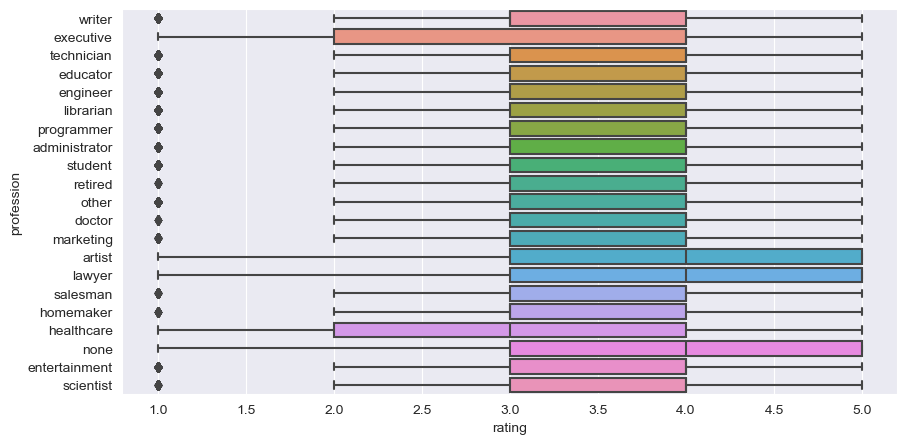

In [117]:
#- Paso 10: Realiza una gráfica que tenga tantos boxplot como tipo de usuarios. Cada boxplot debe representar los números de evaluaciones de esos tipos de usuarios.
plt.figure(figsize=(10,5))
sns.boxplot(y='profession', x='rating', data=merged_df,orient='h')
plt.show()

- Desde tu punto de vista, ¿Cuáles son las peliculas que más les gustan a los usuarios? Indica que valores numéricos o gráficas sustentan tu respuesta.
- Me estoy basando en el paso 8 que aparece que Star Wars es una de las películas con mayor número de evaluaciones y en el paso 6 que aparece que es una de las películas con mayor promedio de calificación.

- Si fueras dueño de una plataforma de streaming de peliculas, ¿Cuàles son las peliculas que eliminarías del catálogo? ¿Por qué? Indica que valores numéricos o gráficas sustentan tu respuesta.
- Eliminaría todas las películas que no tienen casi reseñas porque sabiendo que pocos usuarios buscan esa película entonces quiere decir que la película no es buena y no vale la pena tenerla en la plataforma, me baso simplemente en el paso 3.